In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('C:\\oceny_studentow.csv')
print (data)

     Unnamed: 0  indeks_studenta  ocena_lab  ocena_wyk
0             0           962560        5.0        3.0
1             1           905220        2.0        4.5
2             2           882698        2.0        3.5
3             3           856084        3.5        2.5
4             4           909337        4.0        5.0
..          ...              ...        ...        ...
493         493           909272        5.0        3.5
494         494           860148        4.0        2.0
495         495           919541        2.0        4.0
496         496           915447        4.5        4.0
497         497           905212        4.0        5.0

[498 rows x 4 columns]


In [3]:
data.loc[(data.ocena_lab>=3.0)&(data.ocena_wyk>=3.0)]
data['koncowa']=0.6*data.ocena_wyk+0.4*data.ocena_lab
print(data)
data.to_csv('oceny_studentow_wraz_z_srednia_i_ocenami_koncowymi')

     Unnamed: 0  indeks_studenta  ocena_lab  ocena_wyk  koncowa
0             0           962560        5.0        3.0      3.8
1             1           905220        2.0        4.5      3.5
2             2           882698        2.0        3.5      2.9
3             3           856084        3.5        2.5      2.9
4             4           909337        4.0        5.0      4.6
..          ...              ...        ...        ...      ...
493         493           909272        5.0        3.5      4.1
494         494           860148        4.0        2.0      2.8
495         495           919541        2.0        4.0      3.2
496         496           915447        4.5        4.0      4.2
497         497           905212        4.0        5.0      4.6

[498 rows x 5 columns]


In [20]:
data['ocena_lab'].mean()

3.4467871485943773

In [33]:
x=data[data['ocena_lab']<3.0]['ocena_lab'].count()+data[data['ocena_wyk']<3.0]['ocena_wyk'].count()-data[(data['ocena_lab']<3.0)&(data['ocena_wyk']<3.0)]['indeks_studenta'].count()
print (x)
print(data[data['ocena_lab']>=2.0]['ocena_lab'].count()-x)

248
250


In [6]:
x=data[data['ocena_lab']<3.0]['ocena_lab'].count()+data[data['ocena_wyk']<3.0]['ocena_wyk'].count()-data[(data['ocena_lab']<3.0)&(data['ocena_wyk']<3.0)]['indeks_studenta'].count()
y=data[data['ocena_lab']>=2.0]['ocena_lab'].count()-x
idx=['2.0','2.5','3.0','3.5','4.0','4.5','5.0','srednia ocen','ilość osób które zaliczyły(i wykład i laboratoria)','ilość osób które nie zaliczyły (i wykład i laboratoria)']
wyk=pd.Series([data[data['ocena_wyk']==2.0]['ocena_wyk'].count(),data[data['ocena_wyk']==2.5]['ocena_wyk'].count(),
                data[data['ocena_wyk']==3.0]['ocena_wyk'].count(),data[data['ocena_wyk']==3.5]['ocena_wyk'].count(),
                data[data['ocena_wyk']==4.0]['ocena_wyk'].count(),data[data['ocena_wyk']==4.5]['ocena_wyk'].count(),
                data[data['ocena_wyk']==5.0]['ocena_wyk'].count(),data['ocena_wyk'].mean(),x,y],index=idx)
                
lab=pd.Series([data[data['ocena_lab']==2.0]['ocena_lab'].count(),data[data['ocena_lab']==2.5]['ocena_lab'].count(),
                data[data['ocena_lab']==3.0]['ocena_lab'].count(),data[data['ocena_lab']==3.5]['ocena_lab'].count(),
                data[data['ocena_lab']==4.0]['ocena_lab'].count(),data[data['ocena_lab']==4.5]['ocena_lab'].count(),
                data[data['ocena_lab']==5.0]['ocena_lab'].count(),data['ocena_lab'].mean(),x,y],index=idx)
df=pd.DataFrame([wyk,lab],index=['wykłady',"laboratoria"])
df.to_csv("Podsumowanie.csv")


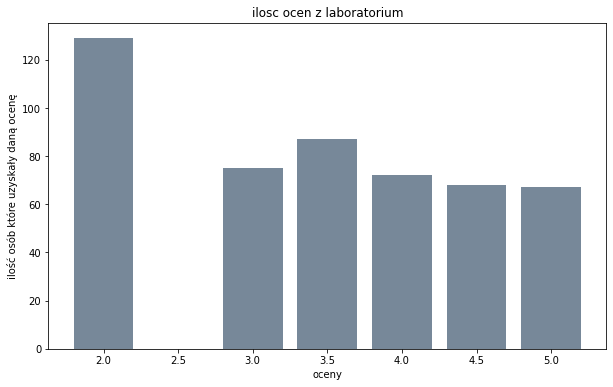

In [8]:
labels=[2.0,2.5,3.0,3.5,4.0,4.5,5.0]
height = [data[data['ocena_lab']==2.0]['ocena_lab'].count(),data[data['ocena_lab']==2.5]['ocena_lab'].count(),
               data[data['ocena_lab']==3.0]['ocena_lab'].count(),data[data['ocena_lab']==3.5]['ocena_lab'].count(),
               data[data['ocena_lab']==4.0]['ocena_lab'].count(),data[data['ocena_lab']==4.5]['ocena_lab'].count(),
               data[data['ocena_lab']==5.0]['ocena_lab'].count()]
position=np.arange(len(height))
f=plt.figure(figsize=(10,6))
plt.bar(position,height,color='lightslategrey')
plt.xticks(position,labels)
plt.xlabel('oceny')
plt.ylabel('ilość osób które uzyskały daną ocenę')
plt.title('ilosc ocen z laboratorium')
plt.show()
f.savefig("fs_mi.pdf")

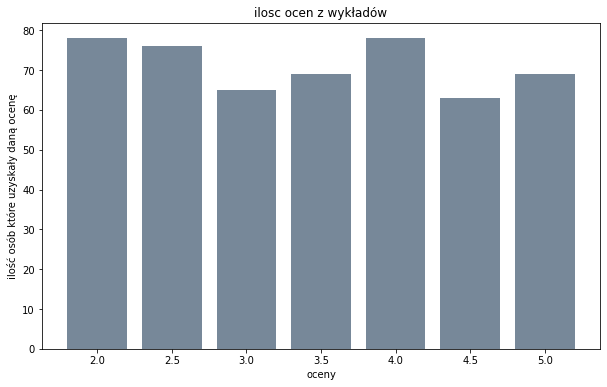

In [47]:
labels=[2.0,2.5,3.0,3.5,4.0,4.5,5.0,]
height = [data[data['ocena_wyk']==2.0]['ocena_wyk'].count(),data[data['ocena_wyk']==2.5]['ocena_wyk'].count(),
               data[data['ocena_wyk']==3.0]['ocena_wyk'].count(),data[data['ocena_wyk']==3.5]['ocena_wyk'].count(),
               data[data['ocena_wyk']==4.0]['ocena_wyk'].count(),data[data['ocena_wyk']==4.5]['ocena_wyk'].count(),
               data[data['ocena_wyk']==5.0]['ocena_wyk'].count()]
position=np.arange(len(height))
plt.figure(figsize=(10,6))
plt.bar(position,height,color='lightslategrey')
plt.xticks(position,labels)
plt.xlabel('oceny')
plt.ylabel('ilość osób które uzyskały daną ocenę')
plt.title('ilosc ocen z wykładów')
plt.show()